### Predict final score using boosting

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb
import pandas as pd
import operator

In [2]:
def plot_fea_import(imp):
    df = pd.DataFrame(imp, columns=['feature', 'fscore'])
    df['fscore'] = df['fscore'] / df['fscore'].sum()
    p = df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(10,6))
    plt.title('XGBoost Feature Importance')
    plt.xlabel('relative importance')

def fea_used():
    watchlist  = [(dtest,'eval'), (dtrain,'train')]
    fea_list = []
    for i in xrange(1,21):
        num_round = i
        bst = xgb.train(param, dtrain, num_round, watchlist)
        importance = bst.get_fscore()
        importance = sorted(importance.items(), key=operator.itemgetter(1))
        plot_fea_import(importance)
        fea_list.append(importance)
        #print importance
    #plt.savefig('old_all_features.png')
    #return fea_list

In [4]:
fea_df = pd.read_pickle('pkl/old_features_df.pkl')
fea_cols = [str(f) for f in fea_df.columns[1:]]

In [5]:
# load file from text file
dtrain = xgb.DMatrix('old_libsvm_train.txt', feature_names=fea_cols)
dtest = xgb.DMatrix('old_libsvm_test.txt', feature_names=fea_cols)

In [6]:
# specify parameters via map, definition are same as c++ version
param = {'max_depth':1, 'eta':1, 'silent':1, 'objective':'binary:logistic' }

In [10]:
# specify validations set to watch performance
watchlist  = [(dtest,'test'), (dtrain,'train')]
num_round = 50
bst = xgb.train(param, dtrain, num_round, watchlist)

[0]	test-error:0.367925	train-error:0.244444
[1]	test-error:0.367925	train-error:0.244444
[2]	test-error:0.330189	train-error:0.211111
[3]	test-error:0.367925	train-error:0.188889
[4]	test-error:0.349057	train-error:0.211111
[5]	test-error:0.358491	train-error:0.166667
[6]	test-error:0.367925	train-error:0.188889
[7]	test-error:0.396226	train-error:0.166667
[8]	test-error:0.367925	train-error:0.166667
[9]	test-error:0.358491	train-error:0.111111
[10]	test-error:0.358491	train-error:0.122222
[11]	test-error:0.377358	train-error:0.155556
[12]	test-error:0.358491	train-error:0.1
[13]	test-error:0.349057	train-error:0.111111
[14]	test-error:0.367925	train-error:0.077778
[15]	test-error:0.358491	train-error:0.111111
[16]	test-error:0.386792	train-error:0.088889
[17]	test-error:0.386792	train-error:0.1
[18]	test-error:0.367925	train-error:0.088889
[19]	test-error:0.367925	train-error:0.1
[20]	test-error:0.40566	train-error:0.066667
[21]	test-error:0.367925	train-error:0.088889
[22]	test-erro

In [11]:
# this is prediction
preds = bst.predict(dtest)
labels = dtest.get_label()

print ('error=%f' % ( sum(1 for i in range(len(preds)) if int(preds[i]>0.5)!=labels[i]) /float(len(preds))))
#bst.save_model('0001.model')

error=0.349057


[0]	eval-error:0.367925	train-error:0.244444
[0]	eval-error:0.367925	train-error:0.244444
[1]	eval-error:0.367925	train-error:0.244444
[0]	eval-error:0.367925	train-error:0.244444
[1]	eval-error:0.367925	train-error:0.244444
[2]	eval-error:0.330189	train-error:0.211111
[0]	eval-error:0.367925	train-error:0.244444
[1]	eval-error:0.367925	train-error:0.244444
[2]	eval-error:0.330189	train-error:0.211111
[3]	eval-error:0.367925	train-error:0.188889
[0]	eval-error:0.367925	train-error:0.244444
[1]	eval-error:0.367925	train-error:0.244444
[2]	eval-error:0.330189	train-error:0.211111
[3]	eval-error:0.367925	train-error:0.188889
[4]	eval-error:0.349057	train-error:0.211111
[0]	eval-error:0.367925	train-error:0.244444
[1]	eval-error:0.367925	train-error:0.244444
[2]	eval-error:0.330189	train-error:0.211111
[3]	eval-error:0.367925	train-error:0.188889
[4]	eval-error:0.349057	train-error:0.211111
[5]	eval-error:0.358491	train-error:0.166667
[0]	eval-error:0.367925	train-error:0.244444
[1]	eval-e

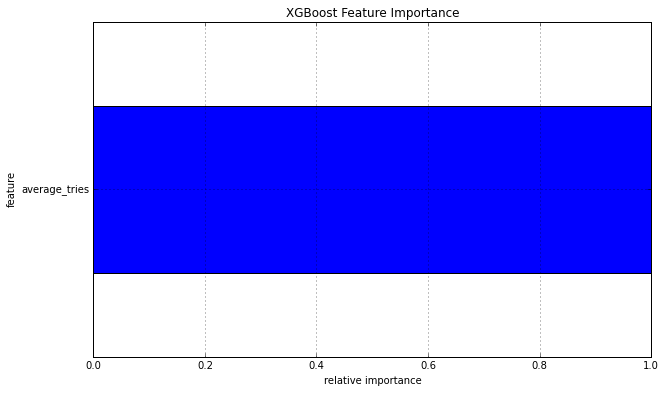

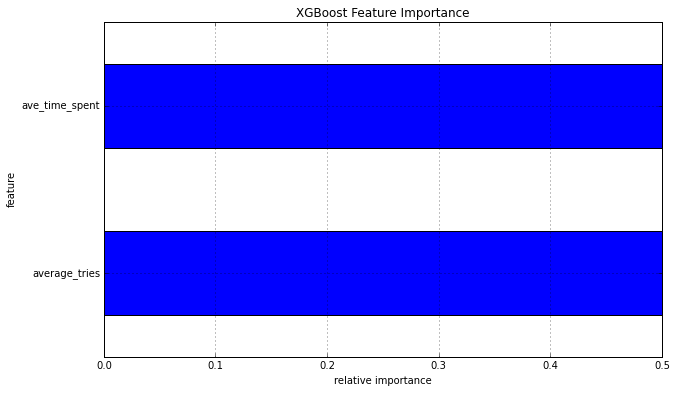

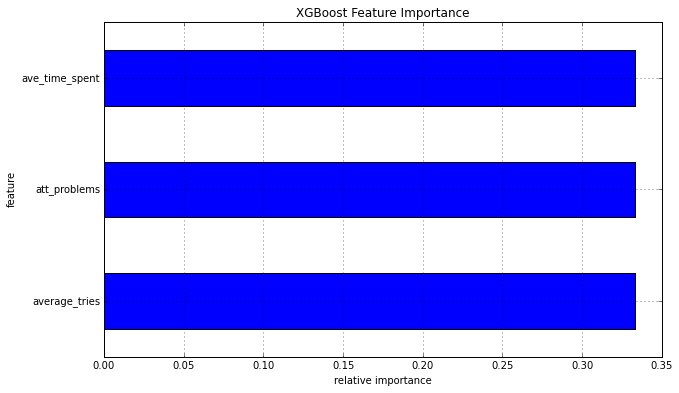

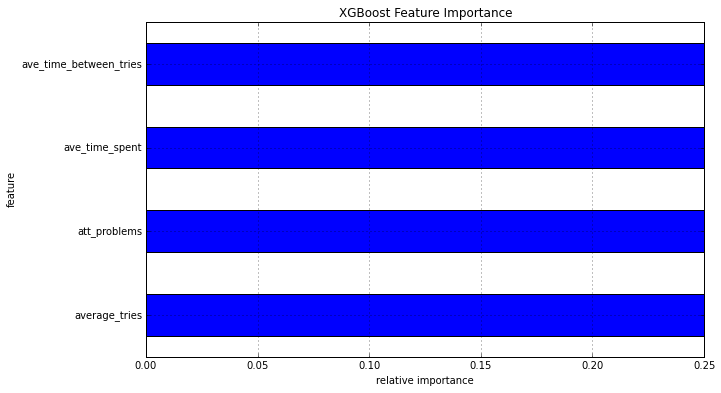

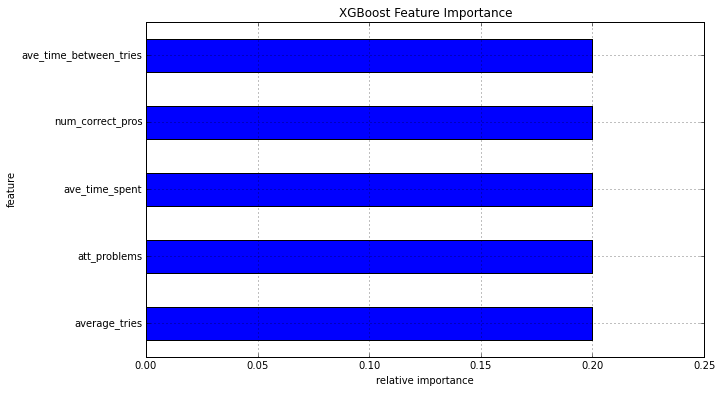

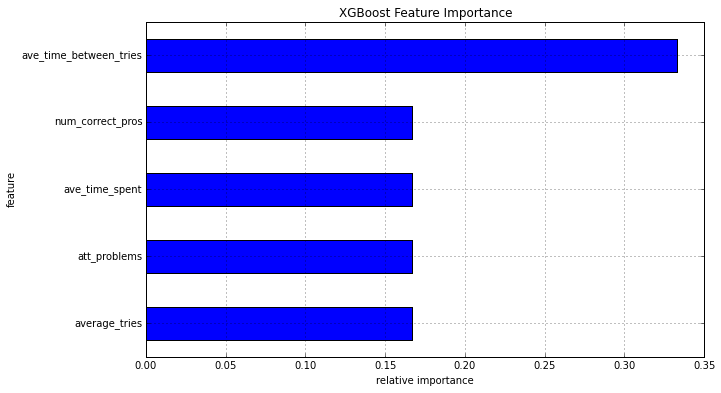

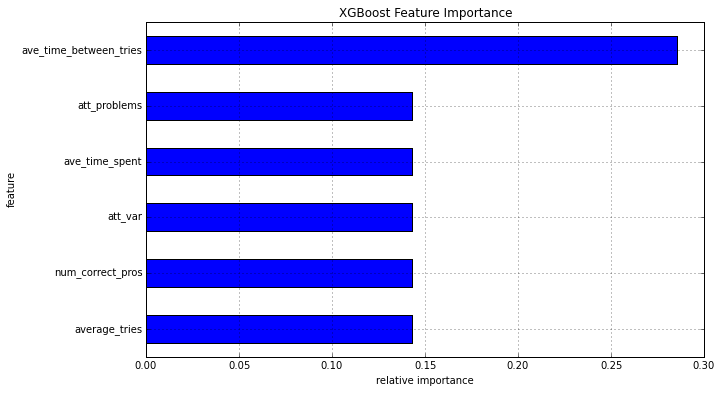

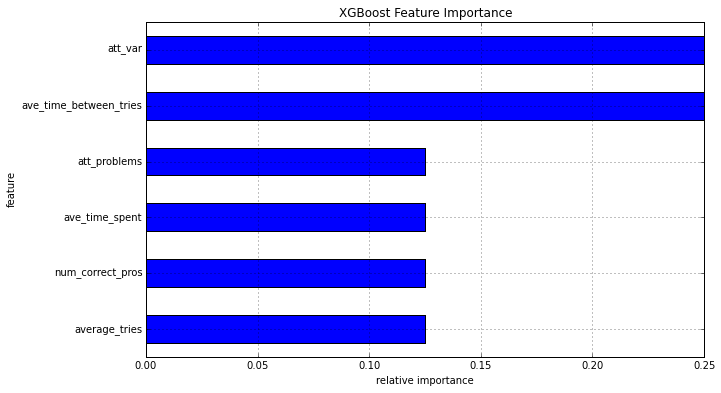

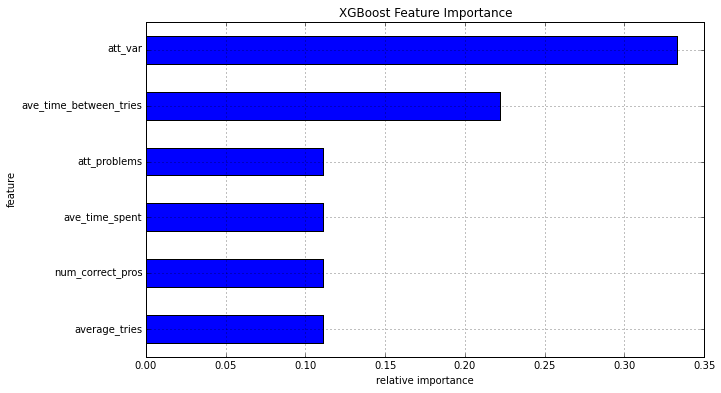

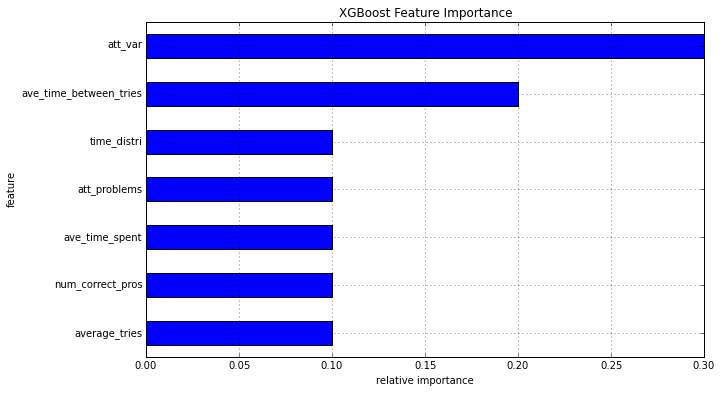

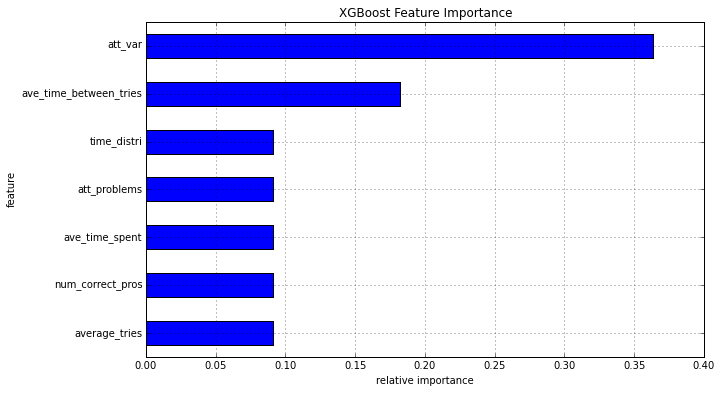

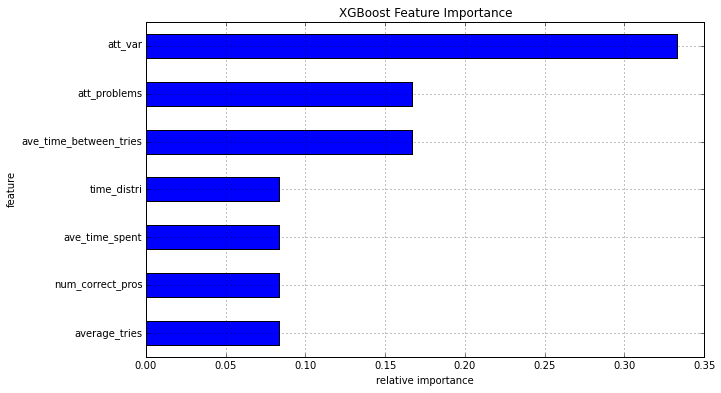

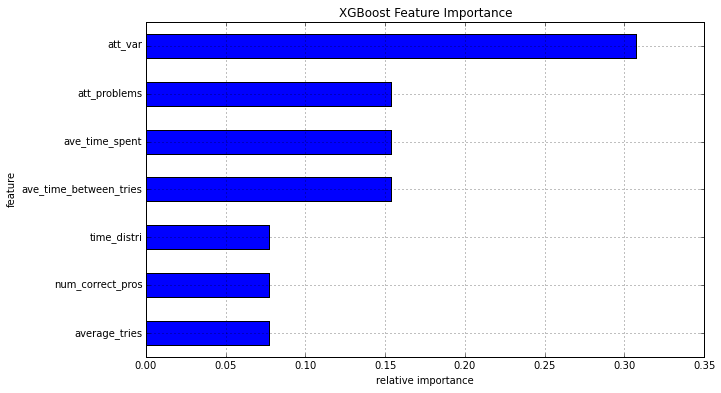

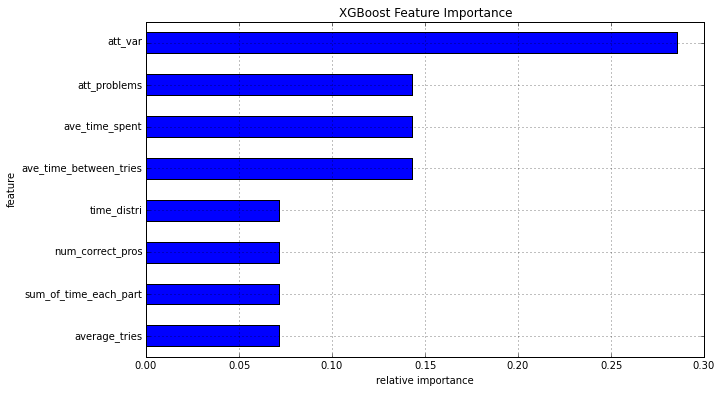

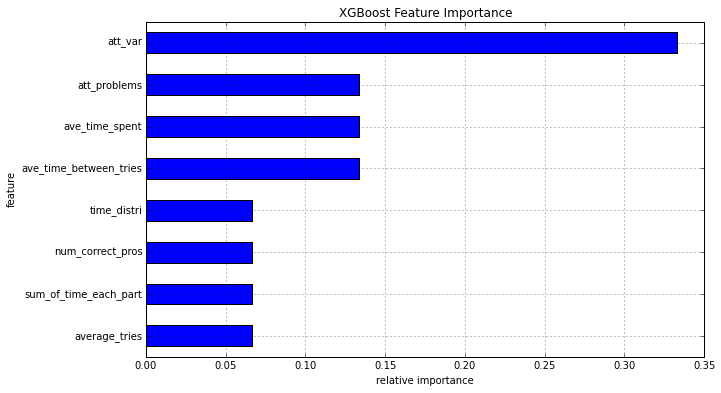

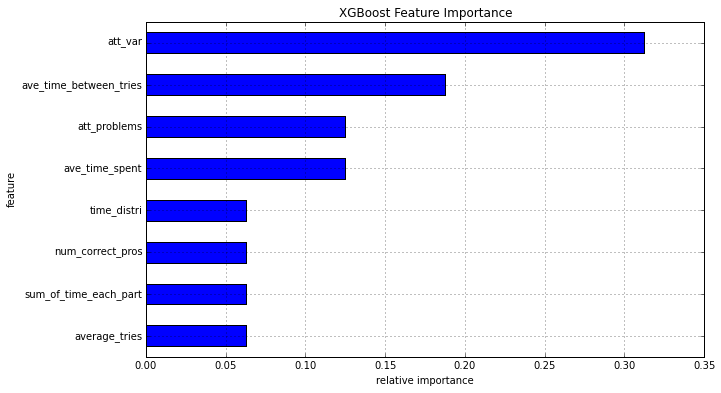

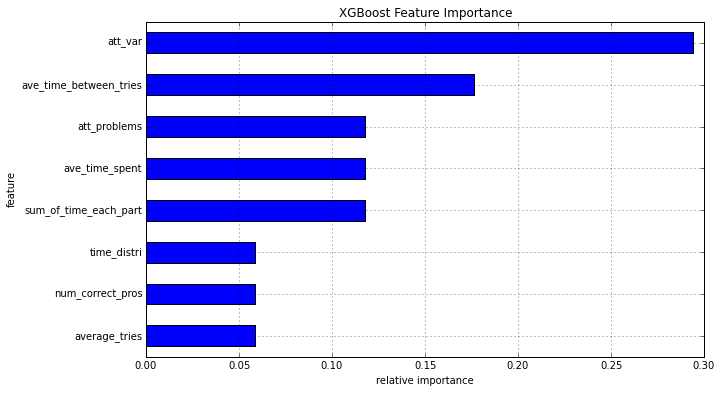

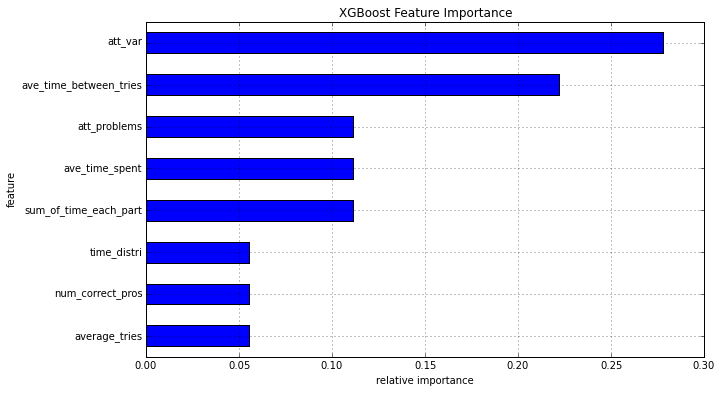

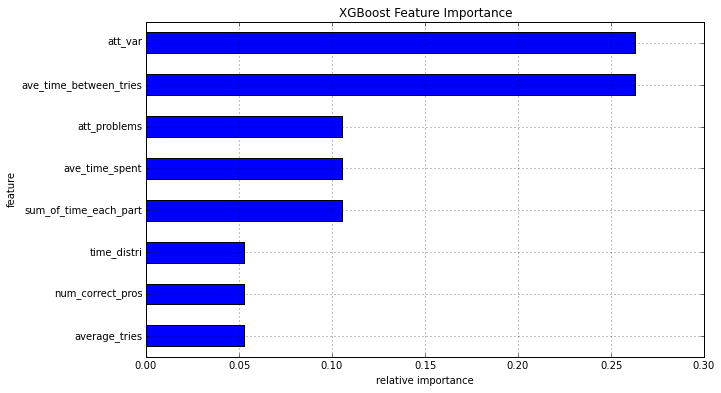

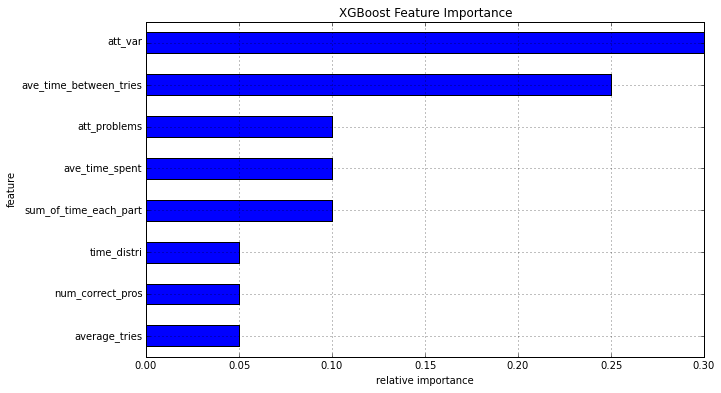

In [12]:
print fea_used()

In [13]:
int_lab = [int(i) for i in labels]
len(int_lab)

106

In [14]:
import pickle as pkl
pkl.dump(int_lab, open('prediction_labels.pkl','w'))

In [15]:
features_df = pd.read_pickle('pkl/old_features_df.pkl')

In [16]:
final_df = pd.read_pickle('pkl/final_df.pkl')

In [18]:
prediction_fill = []
co = 0
no = 0
for ind,row in features_df.iterrows():
    if row['group'][:3] == 'Out':
        prediction_fill.append(int_lab[co])
        co += 1
    else:
        prediction_fill.append(-1)

In [19]:
final_df['predict'] = prediction_fill

In [24]:
import scipy.stats as stats
def statistics(h_df, noh_df, final_col):
    h = len(h_df)
    no_h = len(noh_df)

    hint_mean = h_df[final_col].mean()
    nh_mean = noh_df[final_col].mean()
    hint_std = h_df[final_col].std()
    nh_std = noh_df[final_col].std()

    print h
    print no_h
    print 'strong: ', h/(h+no_h*1.)
    print 'weak: ', no_h/(h+no_h*1.)

    print '\n mean'
    print hint_mean
    print nh_mean

    print '\n std'
    print hint_std
    print nh_std
    
    print '\n ttest'
    print stats.ttest_ind_from_stats(hint_mean, hint_std, h, nh_mean, nh_std, no_h)

In [25]:
pred_strong = final_df[(final_df['predict'] == 1)]
pred_weak = final_df[(final_df['predict'] == 0)]
statistics(pred_strong, pred_weak, 'Total Score')

55
51
strong:  0.518867924528
weak:  0.481132075472

 mean
88.7818181818
64.4656862745

 std
4.07341611614
8.18077313092

 ttest
Ttest_indResult(statistic=19.585111880657653, pvalue=1.1242830676489352e-36)


In [26]:
pred_strong = final_df[(final_df['group'] == 'Strong')]
pred_weak = final_df[(final_df['group'] == 'Weak')]
statistics(pred_strong, pred_weak, 'Total Score')

46
44
strong:  0.511111111111
weak:  0.488888888889

 mean
88.4347826087
65.3181818182

 std
3.95159418695
7.63490371628

 ttest
Ttest_indResult(statistic=18.153034729390232, pvalue=1.6805008409341441e-31)


In [ ]:
### Compute ROC scores and sort them
### and compute the TPR and FPR

In [ ]:
### Do regression to predict final score

In [ ]:
### Try only use the first few weeks. Do average per week.

In [ ]:
### Show the threshold for each feature at each iteration.

In [ ]:
### Scatter plot, final grade (Y) and boosting score (X)

In [ ]:
### Regression on the features picked by boosting